<a href="https://colab.research.google.com/github/Kashfianaz/CNN-code/blob/main/ResNet_Main_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
%matplotlib inline

In [ ]:
# To download checkpoints, Keras models, TFLite models
from google.colab import files

# Life is incomplete without this statement!
import tensorflow as tf

# And this as well!
import numpy as np

import matplotlib



# To visualize results
import matplotlib.pyplot as plt

import os
import datetime

In [ ]:
! pip install keras numpy matplotlib mnist

In [ ]:
import pandas as pd

In [ ]:
matplotlib.style.use('ggplot')

In [ ]:
from keras.layers import Input, Dense,Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1338 images belonging to 28 classes.


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5178 images belonging to 28 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1338 images belonging to 28 classes.


In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
model_ResNet50V2 = ResNet50V2(weights="imagenet",include_top = False, input_shape=IMAGE_SIZE + [3],)

In [ ]:
for layer in model_ResNet50V2.layers:
    layer.trainable = False

In [ ]:
y = Flatten()(model_ResNet50V2.output)

In [ ]:
prediction1 = Dense(28, activation='softmax')(y)

In [ ]:
model1 = Model(inputs=model_ResNet50V2.input, outputs=prediction1)
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
!pip install keras-metrics

In [ ]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'accuracy']
)

In [ ]:
# Assuming you have already defined your model and training data generators

STEPS_PER_EPOCH = 60
EPOCHS = 20

history = model1.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=len(test_set),
    shuffle=True,
    verbose=1
)

<ipython-input-72-ffac80171a46>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(


Epoch 1/20
60/60 [==============================] - 563s 9s/step - loss: 9.1075 - precision_2: 0.6079 - recall_2: 0.5964 - accuracy: 0.5985 - val_loss: 3.8807 - val_precision_2: 0.7967 - val_recall_2: 0.7967 - val_accuracy: 0.7967
Epoch 2/20
60/60 [==============================] - 355s 6s/step - loss: 3.1435 - precision_2: 0.8279 - recall_2: 0.8270 - accuracy: 0.8270 - val_loss: 2.3151 - val_precision_2: 0.9207 - val_recall_2: 0.9200 - val_accuracy: 0.9208
Epoch 3/20
60/60 [==============================] - 357s 6s/step - loss: 2.5791 - precision_2: 0.8606 - recall_2: 0.8606 - accuracy: 0.8606 - val_loss: 1.2113 - val_precision_2: 0.9245 - val_recall_2: 0.9238 - val_accuracy: 0.9245
Epoch 4/20
60/60 [==============================] - 353s 6s/step - loss: 1.6488 - precision_2: 0.9115 - recall_2: 0.9115 - accuracy: 0.9115 - val_loss: 0.9429 - val_precision_2: 0.9477 - val_recall_2: 0.9477 - val_accuracy: 0.9477
Epoch 5/20
60/60 [==============================] - 359s 6s/step - loss: 1.5

In [ ]:
score = model1.evaluate(test_set, verbose=0)
print('Accuracy: %.2f%%' % (score[1] * 100))

Accuracy: 97.76%


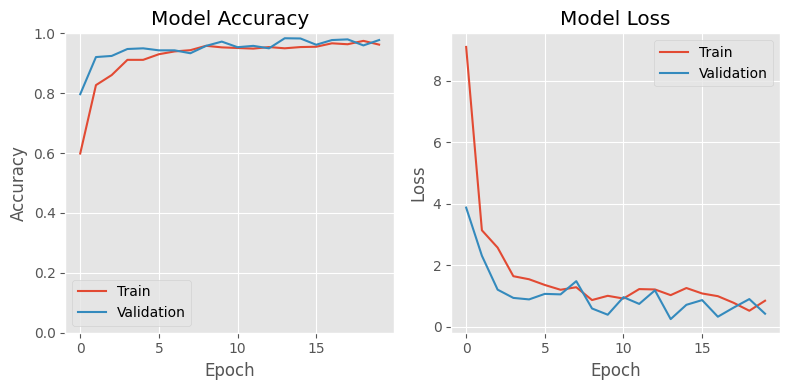

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#plot training and validation accuracy values
axes[0].set_ylim(0,1)
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#predict model
y_pred = model1.predict(validation_set)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
batch_size = 100
target_names = ['free', 'diseases']

import sklearn.metrics as metrics
print('Confusion Matrix')
cm = metrics.confusion_matrix(validation_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(validation_set.classes, y_pred))

84/84 [==============================] - 203s 2s/step
[ 4 26 20 ... 18 13 14]
Confusion Matrix
[[0 3 2 0 4 0 2 3 2 0 0 4 0 1 2 1 0 1 2 2 3 3 4 2 2 4 5 1]
 [2 1 3 1 1 0 2 1 2 0 0 1 2 0 0 0 2 2 2 2 1 3 3 0 3 1 2 5]
 [0 2 1 4 1 0 1 2 3 4 0 0 0 0 1 3 1 3 3 2 0 3 1 0 1 3 2 5]
 [1 0 0 1 4 0 3 2 1 2 1 0 3 2 1 3 4 4 5 7 1 1 2 3 3 2 1 1]
 [0 2 3 2 2 0 0 2 2 1 0 4 2 2 2 1 1 2 2 4 0 2 2 3 0 3 0 4]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 2 0 3 3 0 3 1 1 1 2 0 2 1 1 1 1 1 0 0 1 3 2 1 2 3 1 3]
 [3 2 2 1 1 0 3 1 2 3 3 1 1 1 0 1 2 0 1 2 3 1 2 1 0 3 1 3]
 [2 0 2 1 2 0 1 1 0 3 0 3 1 2 1 1 0 2 1 4 2 2 2 4 1 3 0 3]
 [2 2 1 1 0 0 1 2 1 2 1 2 2 3 1 2 1 5 3 1 2 2 3 0 3 1 1 6]
 [0 1 2 0 2 1 0 1 0 1 1 1 1 3 1 2 3 1 1 0 0 1 1 3 3 2 2 3]
 [3 3 3 1 1 0 2 0 1 3 2 2 1 0 0 4 0 1 1 1 3 1 1 2 1 2 2 1]
 [2 0 0 1 1 0 1 2 4 4 0 4 2 0 0 1 3 0 1 0 2 3 0 4 1 0 4 3]
 [3 0 1 1 0 0 2 2 1 1 0 2 2 3 0 2 1 1 2 2 3 0 1 3 1 1 4 2]
 [0 0 2 2 2 0 0 1 2 1 2 1 0 1 1 2 1 0 1 1 1 0 1 1 2 1 2 2]
 [5 0 0 3 1 0 3 0 2 

In [ ]:
import numpy as np
import sklearn.metrics as metrics

def sensitivity(TPR):
    return np.mean(TPR)

def specificity(TNR):
    return np.mean(TNR)

def precision(PPV):
    return np.mean(PPV)

# Assuming you have already defined 'y_true' and 'y_pred' variables
# 'y_true' contains the true class labels and 'y_pred' contains the predicted class labels

# Sample data (replace this with your actual data)
y_true = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = len(y_true) - (FP + FN + TP)

# Calculate sensitivity (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate specificity (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate precision (Positive Predictive Value)
PPV = TP / (TP + FP)

# Calculate false positive rate (False Alarm Rate)
FPR = FP / (FP + TN)

# Calculate false negative rate (Miss Rate)
FNR = FN / (FN + TP)

# Calculate negative predictive value
NPV = TN / (TN + FN)

# Calculate false discovery rate
FDR = FP / (FP + TP)

# Calculate F1 score
F1 = 2 * TP / (2 * TP + FP + FN)

ACC = (TP + TN) / (TP + FP + FN + TN)

# Calculate mean absolute error
MAE = metrics.mean_absolute_error(y_true, y_pred)

# Calculate root mean squared error
RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

# Print the results
print("Rec=   {:.2f}".format(sensitivity(TPR) * 100))
print("Spe=   {:.2f}".format(specificity(TNR) * 100))
print("Pre=   {:.2f}".format(precision(PPV) * 100))
print("FPR=   {:.2f}".format(np.mean(FPR) * 100))
print("FNR=   {:.2f}".format(np.mean(FNR) * 100))
print("NPV=   {:.2f}".format(np.mean(NPV) * 100))
print("FDR=   {:.2f}".format(np.mean(FDR) * 100))
print("F1=    {:.2f}".format(np.mean(F1) * 100))
print("ACC=   {:.2f}".format(np.mean(ACC) * 100))
print("MAE=   {:.2f}".format(MAE * 100))
print("RMSE=  {:.2f}".format(RMSE * 100))

Rec=   50.00
Spe=   50.00
Pre=   50.00
FPR=   50.00
FNR=   50.00
NPV=   50.00
FDR=   50.00
F1=    49.49
ACC=   50.00
MAE=   50.00
RMSE=  70.71
